In [19]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline  

In [2]:
plt.rcParams["figure.figsize"] = (15, 9) # (w, h)

In [3]:
linkedin_file = "temp_datalab_records_linkedin_company.csv"
# from data incubator / thinkium
activision_stock_file = "ATVI.csv"
# https://finance.yahoo.com/quote/ATVI/history?p=ATVI&.tsrc=fin-srch
activision_googletrends_file = "activision_multiTimeline.csv"
# https://trends.google.com/trends/explore?date=today%205-y&geo=US&q=activision
activision_stock_df = pd.read_csv(activision_stock_file, parse_dates = ["Date"])
df = pd.read_csv(linkedin_file, parse_dates = ['as_of_date', 'date_added', 'date_updated']) 
activision_googletrends_df = pd.read_csv(activision_googletrends_file, skiprows = 2, parse_dates = ['Week'])

/usr/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Linkedin Data 

In [4]:
activision_df = df[df.company_name == 'Activision']
activision_df = activision_df.sort_values('date_added')
activision_df.index = activision_df.date_added
del activision_df['date_added']
activision_df_resampled = activision_df[['followers_count', 'employees_on_platform']].resample('M')
activision_df_mean = activision_df_resampled.mean()
arr = []
for name, group in activision_df_resampled:
    arr.append(group.count()[0])
activision_df_mean['count'] = arr
activision_df_resampled = activision_df_mean
del activision_df_mean, arr

# Activision Industry in general (Computer Games Industry)

In [5]:
# problem: from some date on the industry has no value (NaN)
# seems like this is a problem with the linkedin data
comps_in_pcgames = df[df.industry == activision_df.industry[0]].company_name.unique()
activision_industry_df = df[df.company_name.isin(comps_in_pcgames)]
activision_industry_df = activision_industry_df.sort_values('date_added')
activision_industry_df.index = activision_industry_df.date_added
del activision_industry_df['date_added']

In [6]:
activision_industry_df_resampled = activision_industry_df[['followers_count', 'employees_on_platform']].resample('M')
activision_industry_sum = activision_industry_df_resampled.sum()
arr = []
for name, group in activision_industry_df_resampled:
    arr.append(group.count()[0])
activision_industry_sum['count'] = arr
activision_industry_df_resampled = activision_industry_sum
del activision_industry_sum, arr

In [7]:
activision_industry_df_resampled.head(2)

,followers_count,employees_on_platform,count
date_added,,,
2015-09-30,1031943,35241,15
2015-10-31,2105926,71205,30


# Some Statistics

In [8]:
# number of different companies
print(df.company_name.unique().shape[0], "unique companies")
print("Companies with highest number of openings total:\n")
print(df.company_name.value_counts().head(6), '\n')
print("Companies in {} industry:".format(activision_df.industry[0]), activision_industry_df.company_name.unique().shape[0])

5028 unique companies
Companies with highest number of openings total:

City National Bank    1605
American Airlines     1029
Apple                 1025
Cisco                 1024
Activision            1024
Amgen                 1024
Name: company_name, dtype: int64 

Companies in Computer Games industry: 10


In [9]:
#df.describe()
#activision_df.describe()
#activision_inactivision_industry_df.describe()

In [10]:
del df # not used any more, takes much memory

I will focus on **Activision**, later I might try to automate this for many companies

# Activision Googletrends

In [11]:
activision_googletrends_df.index = activision_googletrends_df.Week
del activision_googletrends_df['Week']
activision_googletrends_df.columns = ['google_trend']

In [12]:
activision_googletrends_df.head(2)

,google_trend
Week,
2014-02-02,27
2014-02-09,22


# Activision Stock

In [13]:
activision_stock_df.index = activision_stock_df.Date
del activision_stock_df['Date']
# difference between high and low
activision_stock_df['high_low_diff'] = activision_stock_df.High - activision_stock_df.Low

In [14]:
activision_stock_df.head(2)

,Open,High,Low,Close,Adj Close,Volume,high_low_diff
Date,,,,,,,
2014-02-03,17.350000,17.350000,16.910000,17.059999,16.405760,7001900,0.44
2014-02-04,17.059999,17.139999,16.799999,16.900000,16.251896,5463700,0.34


# More data sources?
- Something about other game publishers?
- Glassdoor data? https://www.glassdoor.de/Jobs/Activision-Blizzard-Jobs-E605784.htm?filter.radius=31 need to find a way to download it
- Twitter followers?

# Ideas
- Number of job openings good indicator of stock price?
- Can employee satisfaction predict job openings?
- Employee sat + job openings --> stock price?
- Should I apply at that company? Predict employee sat
- Find out something about the different industries in general
- Is it good for your company to post a job offer to linkedin now or tomorrow? When would be the optimal time?

something must have happened on 01/2018. Google trends and employees on linkedin show a peak. Stock not so much

# Resampling

In [15]:
activision_df_resampled = activision_df[['followers_count', 'employees_on_platform']].resample('M')
activision_df_mean = activision_df_resampled.mean()
arr = []
for name, group in activision_df_resampled:
    arr.append(group.count()[0])
activision_df_mean['count'] = arr
activision_df_resampled = activision_df_mean
del activision_df_mean, arr

/usr/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


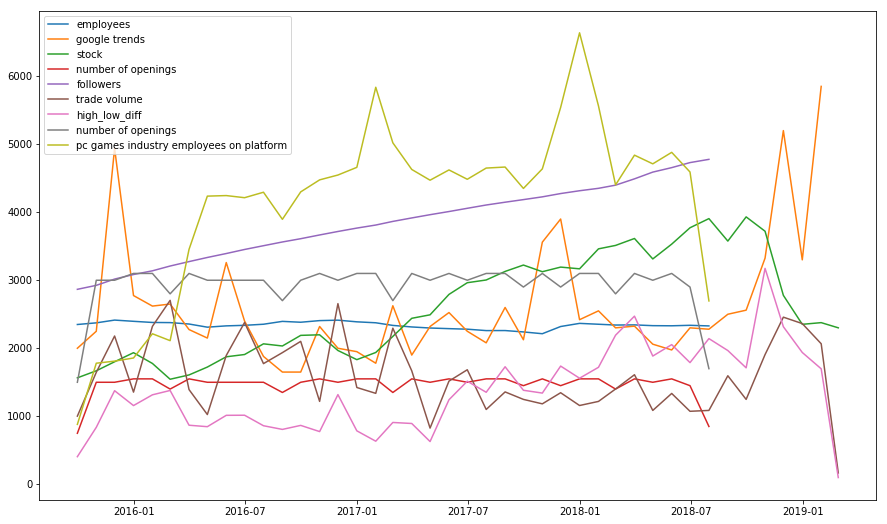

In [16]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax2 = fig1.add_subplot(111)
ax3 = fig1.add_subplot(111)
ax4 = fig1.add_subplot(111)
ax5 = fig1.add_subplot(111)
ax6 = fig1.add_subplot(111)
ax7 = fig1.add_subplot(111)
ax8 = fig1.add_subplot(111)

# scaling numbers are guessed
ax1.plot(activision_df['employees_on_platform'].resample('M').mean(), label = "employees")
ax1.plot(activision_googletrends_df[activision_googletrends_df.index > activision_df.index[0]]['google_trend'].resample('M').mean()*100)
ax1.plot(activision_stock_df[activision_stock_df.index > activision_df.index[0]]['Close'].resample('M').mean()*50)
ax1.plot(activision_df_resampled['count'] * 50)
ax1.plot(activision_df.followers_count.resample('M').mean()/24)
ax1.plot(activision_stock_df[activision_stock_df.index > activision_df.index[0]].Volume.resample('M').sum()/100000)
ax1.plot(activision_stock_df.high_low_diff[activision_stock_df.index > activision_df.index[0]].resample('M').sum() * 50)
ax1.plot(activision_df_resampled['count'] * 100)
ax1.plot(activision_industry_df['employees_on_platform'].resample('M').sum()/40)

ax1.legend(['employees', 'google trends', 'stock', 'number of openings', 'followers', 'trade volume', 'high_low_diff', 'number of openings', 'pc games industry employees on platform'])

**numbers are rescaled for all categories! Only shape is correct**   
seems like the followers count is a good indicator for the general trend of the stock

Google trends and trade volume seem to be highly corellated

In [17]:
activision = activision_df_resampled[['employees_on_platform', 'followers_count']]
activision['open_pos_count'] = activision_df_resampled['count']
activision['google_trend'] = activision_googletrends_df.resample('M').mean()
activision['stock'] = activision_stock_df.Close.resample('M').mean()
activision['stock_high_low_diff'] = (activision_stock_df.High - activision_stock_df.Low).resample('M').mean()
activision['trade_volume'] = activision_stock_df.Volume.resample('M').mean()
activision['employees_in_industry'] = activision_industry_df_resampled.employees_on_platform
activision['followers_in_industry'] = activision_industry_df_resampled.followers_count
activision['openings_in_industry'] = activision_industry_df_resampled['count']

In [18]:
activision.head()

,employees_on_platform,followers_count,open_pos_count,google_trend,stock,stock_high_low_diff,trade_volume,employees_in_industry,followers_in_industry,openings_in_industry
date_added,,,,,,,,,,
2015-09-30,2349.400000,68796.200000,15,18.75,30.060000,0.748095,9.202995e+06,35241,1031943,15
2015-10-31,2373.500000,70197.533333,30,22.50,33.373636,0.761364,7.482759e+06,71205,2105926,30
2015-11-30,2414.133333,72410.933333,30,49.40,36.030000,1.376000,1.090010e+07,72424,2172328,30
2015-12-31,2396.225806,74019.967742,31,27.75,38.699091,1.052273,6.160077e+06,74283,2294619,31
2016-01-31,2379.258065,75326.258065,31,26.20,35.530526,1.384737,1.222412e+07,88528,2557490,54


In [26]:
activision.to_csv('activision_prepared_data.csv')